Nama : Adhitya Saputra
Nim  : 2109106102
Posttes3

Import Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


Memanggil Dataset

In [2]:
dF = pd.read_csv('Corona_NLP_test.csv')
dF

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative



Pie Chart

Pada pie chart di bawah ini, ditampilkan atribut Sentiment yang memiliki lima data, yaitu "Positive", Negative, Neutral, Extremely Positif, dan Extremely Negatif, kalau kita lihat data terbayak ditempatin oleh data Negative dengan angka 1041.


In [6]:
dF['Sentiment'].value_counts()
labels = dF['Sentiment'].value_counts().rename_axis('Sentiment').reset_index(name='Jumlah')
labels

,Sentiment,Jumlah
0,Negative,1041
1,Positive,947
2,Neutral,619
3,Extremely Positive,599
4,Extremely Negative,592


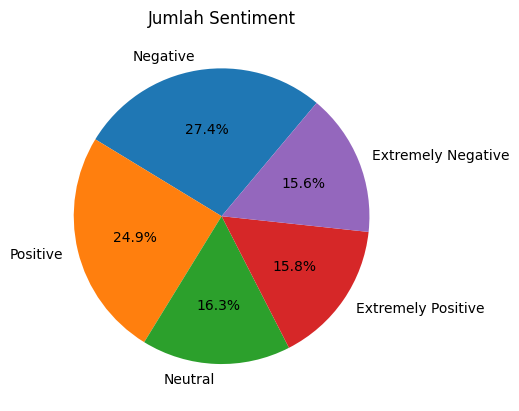

In [7]:
plt.pie(dF['Sentiment'].value_counts(), labels=labels['Sentiment'], autopct='%.1f%%', startangle=50)
plt.title("Jumlah Sentiment")
plt.show()


Heatmap

Pada heatmap di bawah ini, ditampilkan korelasi antara atribut numerik dan Sentiment untuk melihat hubungan atau keterkaitan antara atribut numerik dengan Sentiment.

In [34]:
dF['Sentiment_numeric'] = dF['Sentiment'].apply(lambda x: 1 if x.strip() == '50K' else 0)

In [13]:
atribut_numerik = ['UserName', 'ScreenName', 'TweetAt', 'Sentiment_numeric']

In [14]:
correlation_matrix = dF[atribut_numerik].corr()

C:\Users\Adtsa\AppData\Local\Temp\ipykernel_6408\3444849405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dF[atribut_numerik].corr()


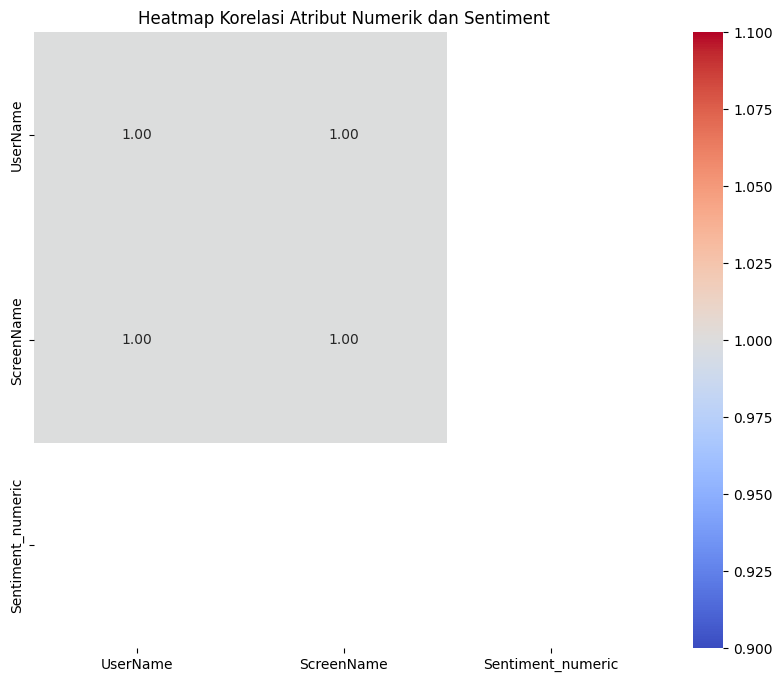

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Atribut Numerik dan Sentiment')
plt.show()


Grafik Batang

Pada grafik batang di bawah ini, ditampilkan data Sentiment dan jumlahnya untuk memvisualisasikan seberapa banyak jumlah data hasil covid-19

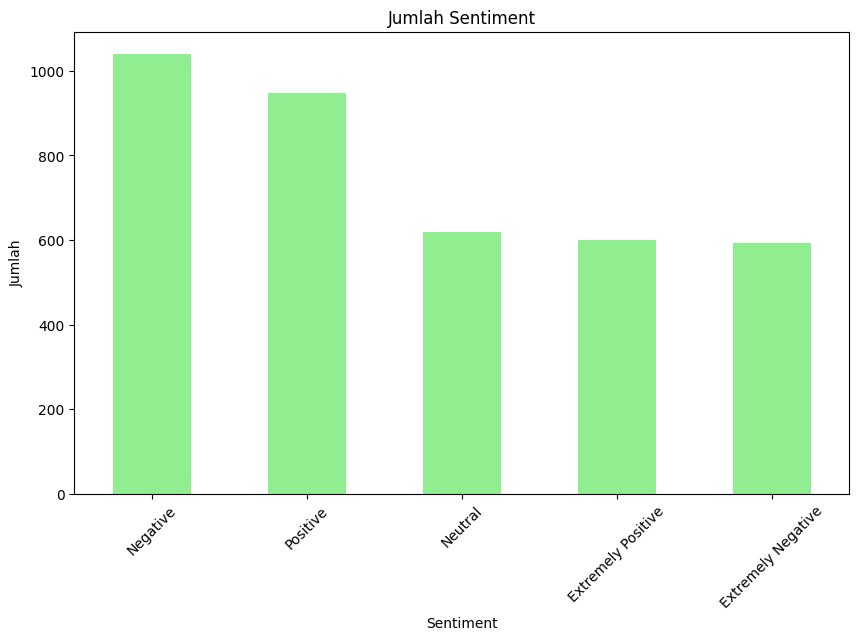

In [16]:
jumlah_Sentiment = dF['Sentiment'].value_counts()  
plt.figure(figsize=(10, 6))
jumlah_Sentiment.plot(kind='bar', color='lightgreen')
plt.title('Jumlah Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


Histogram

Pada histogram di bawah ini, ditampilkan data Sentiment dan jumlahnya berdasarkan data Sentiment, dengan tujuan untuk melihat seberapa banyak orang yang terkena covid-19.


In [36]:
Negative_Sentiment = dF[dF['Sentiment'] == 'Negative']['Sentiment']
Positive_Sentiment= dF[dF['Sentiment'] == 'Positive']['Sentiment']
Neutral_Sentiment = dF[dF['Sentiment'] == 'Neutral']['Sentiment']
Extremely_Negative_Sentiment = dF[dF['Sentiment'] == 'Extremely_Negative']['Sentiment']
Extremely_Positive_Sentiment = dF[dF['Sentiment'] == 'Extremely_Positive']['Sentiment']


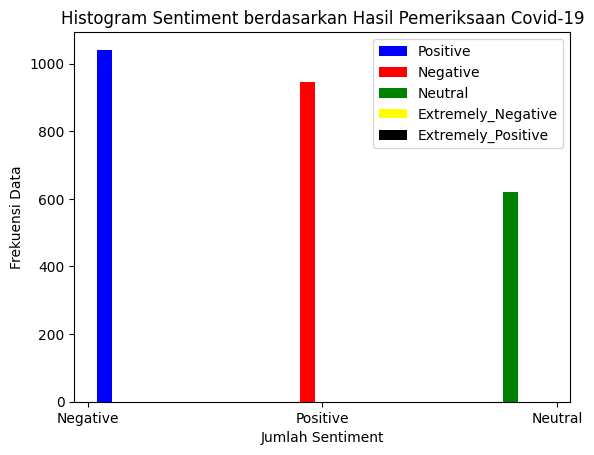

In [37]:
plt.hist([Negative_Sentiment, Positive_Sentiment, Neutral_Sentiment, Extremely_Negative_Sentiment, Extremely_Positive_Sentiment ], bins=5, color=['blue', 'red', 'green', 'yellow', 'black'], label=['Positive', 'Negative', 'Neutral', 'Extremely_Negative', 'Extremely_Positive'])
plt.title("Histogram Sentiment berdasarkan Hasil Pemeriksaan Covid-19")
plt.xlabel('Jumlah Sentiment')
plt.ylabel('Frekuensi Data')
plt.legend()  
plt.show()